In [1]:
import numpy as np

arr = np.load("ch2_ohr_ncp_20200825T1127278043_d_img_d18.npz", allow_pickle= True)['arr_0']

In [2]:
arr

array([[87, 85, 87, ...,  0,  0,  0],
       [90, 85, 87, ...,  0,  0,  0],
       [99, 92, 91, ..., 35, 31, 24],
       ...,
       [46, 49, 48, ..., 23, 19, 17],
       [42, 44, 40, ..., 24, 23, 22],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [3]:
arr.shape

(93693, 12000)

In [4]:
arr = np.float32(arr)

In [5]:
arr = arr[:93632,:11968]

In [6]:
arr.shape

(93632, 11968)

In [7]:
# Define the size of the 2D array
m, p = 93632, 11968

# Define the size of the 3D array
n = m * p // (64 * 64)
result = np.zeros((n, 64, 64))

# Convert the 2D array to a 3D array
for i in range(n):
    x = (i * 64) % p
    y = (i * 64) // p * 64
    result[i] = arr[y:y+64, x:x+64]/255

print(result.shape)

KeyboardInterrupt: 

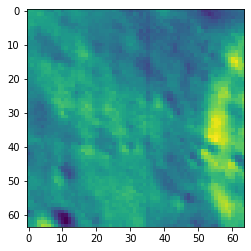

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(result[56])

In [121]:
result=np.reshape(result,(2628,64,64,1))

In [122]:
import keras
import tensorflow
from keras.utils import plot_model
from keras.layers import Input, Flatten, Dense, Conv2D, Conv2DTranspose, BatchNormalization, LeakyReLU, Dropout, Activation, Reshape, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

ENCODER

In [123]:
encoder_input = Input(shape=(64,64,1), name='encoder_input')

In [124]:
x = encoder_input

In [125]:
# n_layers_encoder = 2
# input_dim = (64,64,1)
# encoder_conv_filters = [32,1,64, 64]
# encoder_conv_kernel_size = [3,3,3,3]
# encoder_conv_strides = [1,2,2,1]
# decoder_conv_t_filters = [64,64,32,1]
# decoder_conv_t_kernel_size = [3,3,3,3]
# decoder_conv_t_strides = [1,2,2,1]
# z_dim = 64*64



In [126]:
# for i in range(n_layers_encoder):
#     conv_layer = Conv2D(
#     filters = encoder_conv_filters[i]
#     , kernel_size = encoder_conv_kernel_size[i]
#     , strides = encoder_conv_strides[i]
#     , padding = 'same'
#     , name = 'encoder_conv_' + str(i)
#     )
#     x = conv_layer(x)
#     #if i//2:
#     x = BatchNormalization()(x)
#     x = LeakyReLU()(x)
#     x = Dropout(rate = 0.25)(x)
    

In [127]:
# shape_before_flattening = K.int_shape(x)[1:]
# x = Flatten()(x)

In [128]:
# mu = Dense(z_dim, name='mu')(x) 
# log_var = Dense(z_dim, name='log_var')(x)
# encoder_mu_log_var = Model(encoder_input, (mu, log_var)) 

# def sampling(args):
#     mu, log_var = args
#     epsilon = K.random_normal(shape=K.shape(mu), mean=0., stddev=1.)
#     return mu + K.exp(log_var / 2) * epsilon
# encoder_output = Lambda(sampling, name='encoder_output')([mu, log_var]) 

In [129]:
x = Conv2D(filters = 64, kernel_size = 2
 , strides = 2, padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


In [130]:
x = Conv2D(filters = 32, kernel_size = 2, strides = 2)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

In [131]:
shape_before_flattening = K.int_shape(x)[1:]

In [132]:
x = Flatten()(x)
output_layer = Activation('softmax')(x)

model = Model(encoder_input, output_layer)

DECODER

In [133]:
decoder_input = Input(shape=(64*64,), name='encoder_output')

In [134]:
# # x = Dense(np.prod(shape_before_flattening))(encoder_output) 
# x = Reshape(shape_before_flattening)(encoder_output)

In [135]:
# n_layers_decoder=1
# for i in range(n_layers_decoder):
#     conv_t_layer = Conv2DTranspose(
#     filters = decoder_conv_t_filters[i]
#     ,kernel_size = decoder_conv_t_kernel_size[i]
#     ,strides = decoder_conv_t_strides[i]
#     ,padding = 'same'
#     ,name = 'decoder_conv_t_' + str(i)
#     )
#     x = conv_t_layer(x) 
# #     x = BatchNormalization()(x)
# #     if (i < n_layers_decoder - 1)  and i//2:
# #         x = LeakyReLU()(x)
# #     else:
#     x = Activation('sigmoid')(x)

# #     x = Dropout(rate = 0.25)(x)


In [136]:
# decoder_output = x

In [137]:
 #decoder = Model(decoder_input, decoder_output)

In [138]:
#decoder.summary()

In [139]:
# model = Model(encoder_input,decoder_output)

In [140]:
# model.summary()

In [141]:
y = Reshape(shape_before_flattening)(x)

In [142]:
conv1 = Conv2DTranspose(filters = 64, kernel_size = 2, strides = 2)(y)

In [143]:
conv2 = Conv2DTranspose(filters = 1, kernel_size = 2, strides = 2)(conv1)

In [144]:
model = Model(encoder_input, conv2)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        8224      
                                                                 
 batch_normalization_5 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

In [145]:
class AutoencoderLoss(tensorflow.keras.losses.Loss):
    def __init__(self):
        super(AutoencoderLoss, self).__init__()
        self.loss_fn = tensorflow.keras.losses.MeanSquaredError()  # mean squared error loss
    
    def call(self, input, output):
        loss = self.loss_fn(input, output)
        return loss


los = AutoencoderLoss()

optimizer = keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer=optimizer, loss= los)


In [146]:
# learning_rate=0.0005
# r_loss_factor=10
# optimizer = Adam(lr=learning_rate)

# def vae_r_loss(y_true, y_pred):
#     r_loss = K.mean(K.square(y_true - y_pred), axis = [1,2,3])
#     return r_loss_factor * r_loss
# def vae_kl_loss(y_true, y_pred):
#     kl_loss = -0.5 * K.sum(1 + log_var - K.square(mu)- K.exp(log_var), axis = 1)
#     return kl_loss
# def vae_loss(y_true, y_pred):
#     r_loss = vae_r_loss(y_true, y_pred)
#     kl_loss = vae_kl_loss(y_true, y_pred)
#     return r_loss + kl_loss

# optimizer = Adam(lr=learning_rate)
# model.compile(optimizer=optimizer, loss = vae_loss, metrics = [vae_r_loss, vae_kl_loss])

In [147]:
# optimizer = Adam(lr=0.005)
# model.compile(optimizer,loss='mse')

In [148]:
model.fit(result, result, batch_size= 100, shuffle= True, epochs= 10)

Epoch 1/10
27/27 [==============================] - 5s 153ms/step - loss: 0.0157
Epoch 2/10
27/27 [==============================] - 4s 153ms/step - loss: 0.0012
Epoch 3/10
27/27 [==============================] - 4s 135ms/step - loss: 5.5465e-04
Epoch 4/10
27/27 [==============================] - 3s 127ms/step - loss: 7.9232e-04
Epoch 5/10
27/27 [==============================] - 3s 124ms/step - loss: 4.8879e-04
Epoch 6/10
27/27 [==============================] - 3s 127ms/step - loss: 4.8389e-04
Epoch 7/10
27/27 [==============================] - 3s 124ms/step - loss: 8.3566e-04
Epoch 8/10
27/27 [==============================] - 3s 120ms/step - loss: 0.0011
Epoch 9/10
27/27 [==============================] - 4s 137ms/step - loss: 3.2664e-04
Epoch 10/10
27/27 [==============================] - 4s 131ms/step - loss: 3.4783e-04


In [149]:
 model.fit(result, result, batch_size= 100, shuffle= True, epochs= 10)

Epoch 1/10
27/27 [==============================] - 3s 124ms/step - loss: 6.7111e-04
Epoch 2/10
27/27 [==============================] - 3s 117ms/step - loss: 5.8974e-04
Epoch 3/10
27/27 [==============================] - 3s 119ms/step - loss: 6.2715e-04
Epoch 4/10
27/27 [==============================] - 3s 119ms/step - loss: 3.3899e-04
Epoch 5/10
27/27 [==============================] - 3s 118ms/step - loss: 4.9684e-04
Epoch 6/10
27/27 [==============================] - 3s 119ms/step - loss: 4.2093e-04
Epoch 7/10
27/27 [==============================] - 3s 117ms/step - loss: 4.1913e-04
Epoch 8/10
27/27 [==============================] - 3s 124ms/step - loss: 3.5489e-04
Epoch 9/10
27/27 [==============================] - 3s 120ms/step - loss: 3.9638e-04
Epoch 10/10
27/27 [==============================] - 3s 118ms/step - loss: 2.4273e-04


In [ ]:
 model.fit(result, result, batch_size= 100, shuffle= True, epochs= 10)

Epoch 1/10
27/27 [==============================] - 4s 133ms/step - loss: 2.9618e-04
Epoch 2/10
27/27 [==============================] - 3s 124ms/step - loss: 5.0680e-04
Epoch 3/10
27/27 [==============================] - 3s 106ms/step - loss: 4.2922e-04
Epoch 4/10
27/27 [==============================] - 3s 111ms/step - loss: 3.6434e-04
Epoch 5/10
27/27 [==============================] - 3s 111ms/step - loss: 4.4244e-04
Epoch 6/10
27/27 [==============================] - 3s 112ms/step - loss: 2.7181e-04
Epoch 7/10
27/27 [==============================] - 3s 129ms/step - loss: 2.5093e-04
Epoch 8/10
27/27 [==============================] - 4s 130ms/step - loss: 3.1601e-04
Epoch 9/10
11/27 [===========>..................] - ETA: 2s - loss: 2.0342e-04

In [151]:
final = model.predict(
    result,
    batch_size = None,
    verbose = 'auto',
    steps = None,
    callbacks = None,
    max_queue_size = 10,
    workers = 1,
    use_multiprocessing=False
)

83/83 [==============================] - 1s 14ms/step


In [152]:
final.shape

(2628, 64, 64, 1)

In [153]:
final

array([[[[0.32504094],
         [0.3162278 ],
         [0.32429093],
         ...,
         [0.36225522],
         [0.35580456],
         [0.33624166]],

        [[0.3466764 ],
         [0.33698034],
         [0.33396974],
         ...,
         [0.37515578],
         [0.37026763],
         [0.36487794]],

        [[0.35616487],
         [0.34258097],
         [0.3349442 ],
         ...,
         [0.3678375 ],
         [0.3578874 ],
         [0.35286498]],

        ...,

        [[0.2970323 ],
         [0.30135024],
         [0.29651648],
         ...,
         [0.30119944],
         [0.28691804],
         [0.28234974]],

        [[0.29064327],
         [0.29454118],
         [0.28739053],
         ...,
         [0.2993367 ],
         [0.28996152],
         [0.2853255 ]],

        [[0.30191648],
         [0.31092858],
         [0.29311222],
         ...,
         [0.30703315],
         [0.29045838],
         [0.29493418]]],


       [[[0.33877304],
         [0.33250996],
         [0.34

In [154]:
final=final*255

In [155]:
final

array([[[[ 82.88544 ],
         [ 80.638084],
         [ 82.69419 ],
         ...,
         [ 92.37508 ],
         [ 90.73016 ],
         [ 85.74162 ]],

        [[ 88.40248 ],
         [ 85.929985],
         [ 85.162285],
         ...,
         [ 95.66473 ],
         [ 94.41824 ],
         [ 93.04388 ]],

        [[ 90.822044],
         [ 87.35815 ],
         [ 85.41077 ],
         ...,
         [ 93.79856 ],
         [ 91.261284],
         [ 89.98057 ]],

        ...,

        [[ 75.74323 ],
         [ 76.84431 ],
         [ 75.6117  ],
         ...,
         [ 76.805855],
         [ 73.1641  ],
         [ 71.99918 ]],

        [[ 74.11404 ],
         [ 75.108   ],
         [ 73.284584],
         ...,
         [ 76.33086 ],
         [ 73.940186],
         [ 72.758   ]],

        [[ 76.9887  ],
         [ 79.28679 ],
         [ 74.743614],
         ...,
         [ 78.29346 ],
         [ 74.06689 ],
         [ 75.20821 ]]],


       [[[ 86.38712 ],
         [ 84.79004 ],
         [ 88.

In [156]:
final.astype(int)

array([[[[ 82],
         [ 80],
         [ 82],
         ...,
         [ 92],
         [ 90],
         [ 85]],

        [[ 88],
         [ 85],
         [ 85],
         ...,
         [ 95],
         [ 94],
         [ 93]],

        [[ 90],
         [ 87],
         [ 85],
         ...,
         [ 93],
         [ 91],
         [ 89]],

        ...,

        [[ 75],
         [ 76],
         [ 75],
         ...,
         [ 76],
         [ 73],
         [ 71]],

        [[ 74],
         [ 75],
         [ 73],
         ...,
         [ 76],
         [ 73],
         [ 72]],

        [[ 76],
         [ 79],
         [ 74],
         ...,
         [ 78],
         [ 74],
         [ 75]]],


       [[[ 86],
         [ 84],
         [ 88],
         ...,
         [142],
         [147],
         [144]],

        [[ 90],
         [ 90],
         [ 89],
         ...,
         [138],
         [146],
         [149]],

        [[ 90],
         [ 89],
         [ 88],
         ...,
         [117],
         [

In [157]:
final[0].shape

(64, 64, 1)

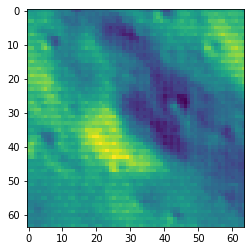

In [158]:
plt.imshow(final[0])

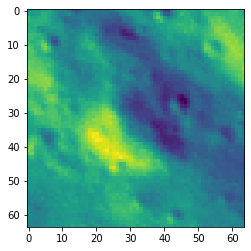

In [159]:
plt.imshow(result[0])

In [160]:
model2 = Model(y, conv2)
model2.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 16, 16, 32)]      0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 32, 32, 64)       8256      
 ranspose)                                                       
                                                                 
 conv2d_transpose_5 (Conv2DT  (None, 64, 64, 1)        257       
 ranspose)                                                       
                                                                 
Total params: 8,513
Trainable params: 8,513
Non-trainable params: 0
_________________________________________________________________


In [165]:
a = np.random.rand(1,64,64,1)

In [167]:
test = model.predict(
    a,
    batch_size = None,
    verbose = 'auto',
    steps = None,
    callbacks = None,
    max_queue_size = 10,
    workers = 1,
    use_multiprocessing=False
)

1/1 [==============================] - 0s 19ms/step


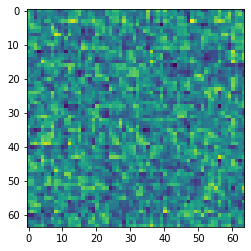

In [168]:
plt.imshow(test[0])